In [6]:
"""
In order to run the code as is, you will need scipy, pandas and tqdm installed 
(although tqdm is only needed for the progress bar, and pandas is only for the autocorrelation function)
All of these can be installed (on linux) from the command interface using 'pip'
""" 

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from MHrank import MH_sample 
from eprank import exprop
import pandas
from cw2 import sorted_barplot

We first need to load the data, stored in "tennis_data.mat". The data consists of an array, $W$ containing the names of each player, and an array, G, containing the results of all of the matches in the season. 

In [7]:
# set seed for reproducibility
np.random.seed(0)
# load data
data = sio.loadmat('tennis_data.mat')
# Array containing the names of each player
W = data['W']
# loop over array to format more nicely
for i, player in enumerate(W):
    W[i] = player[0]
# Array of size num_games x 2. The first entry in each row is the winner of game i, the second is the loser
games = data['G'] - 1
num_players = W.shape[0]
num_games = games.shape[0]

# MCMC sampling (this may take a minute)

In [8]:
# number of iterations -- the more the better!
num_its = 5000
# perform Metropolis MCMC sampling, skill samples is an num_players x num_samples array
skill_samples = MH_sample(games, num_players, num_its)

# discard the first half of the samples (burn-in period)
# skill_samples = skill_samples[:,num_its//2:]

100%|██████████| 5000/5000 [00:48<00:00, 102.29it/s]

Acceptance rate: 0.449


['Juan-Monaco']


[]

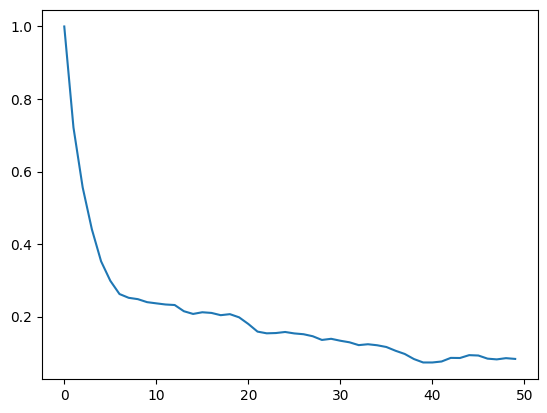

In [9]:
# plotting the autocorrelation function for player i
i = 1
autocor = np.zeros(50)
print(W[i])
for t in range(50):
    autocor[t]=pandas.Series.autocorr(pandas.Series(skill_samples[i,:]),lag=t)
plt.plot(autocor)
plt.plot()

Text(0.5, 1.0, "Skill samples for player ['Novak-Djokovic']")

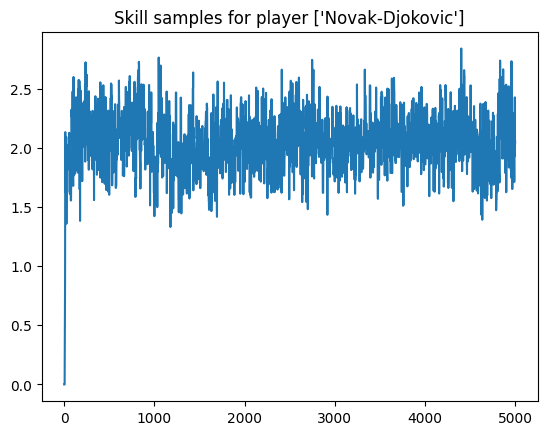

In [10]:
i = 15
plt.plot(range(num_its), skill_samples[i, :])
plt.title(f'Skill samples for player {W[i]}')

# Expectation propagation ranking

In [11]:
# run message passing algorithm, returns mean and variance for each player
ep_mean, ep_var = exprop(games, num_players, num_its = 3).T

In [12]:
import arviz as az 
chain = skill_samples[:, :, np.newaxis].T
print(chain.shape)
idata = az.from_dict(posterior={"x": chain})
az.summary(idata)

arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)


(1, 5000, 107)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x[0],1.612,0.207,1.244,1.998,0.014,0.004,210.0,761.0,NaN
x[1],0.307,0.218,-0.122,0.689,0.015,0.006,205.0,565.0,NaN
x[2],0.840,0.207,0.449,1.210,0.016,0.005,176.0,889.0,NaN
x[3],0.632,0.200,0.267,1.017,0.013,0.005,229.0,609.0,NaN
x[4],1.663,0.227,1.256,2.087,0.014,0.007,249.0,708.0,NaN
...,...,...,...,...,...,...,...,...,...
x[102],-0.865,0.803,-2.357,0.650,0.040,0.024,398.0,558.0,NaN
x[103],-0.611,0.849,-2.225,0.968,0.043,0.026,397.0,541.0,NaN
x[104],-1.282,0.540,-2.329,-0.321,0.022,0.013,618.0,948.0,NaN
x[105],-0.391,0.833,-1.989,1.146,0.039,0.024,453.0,683.0,NaN
